In [158]:
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report

In [134]:
df=pd.read_csv('C:\\Users\\Ekko\\Downloads\\news\\news.csv')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [135]:
df.text[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [136]:
df.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [137]:
df.shape

(6335, 4)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

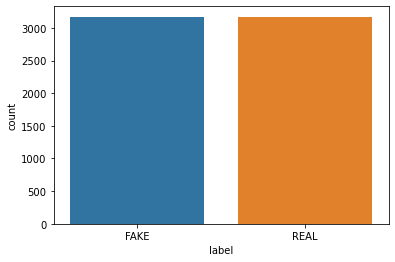

In [138]:
sns.countplot(df.label)

In [139]:
df.drop(['Unnamed: 0','title'],axis=1,inplace=True)

In [140]:
df.head()

,text,label
0,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,It's primary day in New York and front-runners...,REAL


# Build the model

In [141]:
x_tr,x_te,y_tr,y_te=train_test_split(df.text,df.label,test_size=0.2)

#### <font color='blue'>Vectorize the text attribute</font>

In [142]:
tfidf_vectorizer=TfidfVectorizer()

tfidf_train=tfidf_vectorizer.fit_transform(x_tr) 
tfidf_test=tfidf_vectorizer.transform(x_te)

####  <font color='blue'>Choosing the best model by using GridSearchCV</font>

In [143]:
collection = {
        'random_forest':{
           'model':RandomForestClassifier(),
            'params':{
                'n_estimators':[1,5,10,30,40]
            } 
        },
        'logistic_reg':{
            'model':LogisticRegression(solver='liblinear',multi_class='auto'),
            'params':{
                'C':[1,5,10],
            }
        },
       
        'naive_bayes_multinomial':{
            'model':MultinomialNB(),
            'params':{}
        },
        'decision_tree':{
            'model':DecisionTreeClassifier(),
            'params':{
                'criterion':['entropy','gini']
            }
        }
    }

In [144]:
x_tr

5896    Email \n\nThe day after Hillary Clinton testif...
195     Written by Daniel McAdams   While Americans we...
61      On this day in 1973, J. Fred Buzhardt, a lawye...
5670    The chances of Donald Trump becoming the Repub...
1692    This post was originally published on this sit...
                              ...                        
2029    Get short URL 0 8 0 0 A parliamentary inquiry ...
2618    (CNN) Tori Sisson and Shanté Wolfe of Tuskegee...
4602    Michael D'Antonio is the author of the new boo...
6006    Every GOP presidential candidate, most especia...
4140    I’m not among those Republicans who have “evol...
Name: text, Length: 5068, dtype: object

In [145]:
for model_name,data in collection.items() :
    clf=GridSearchCV(data['model'],data['params'],cv=5,return_train_score=False)
    clf.fit(tfidf_train,y_tr)
    print("{},{} =>{} ".format(model_name,clf.best_params_,clf.best_score_))

random_forest,{'n_estimators': 40} =>0.8721361939753617 
logistic_reg,{'C': 10} =>0.9360687784637971 
naive_bayes_multinomial,{} =>0.7847290937730607 
decision_tree,{'criterion': 'gini'} =>0.8137344696460802 


In [146]:
model=LogisticRegression(C=10)
model.fit(tfidf_train,y_tr)
model.score(tfidf_test,y_te)

0.9392265193370166

####  <font color='blue'>Confustion Matrix</font> 

In [147]:
y_predicted=model.predict(tfidf_test)
con_ma=confusion_matrix(y_te,y_predicted,)
con_ma

array([[609,  28],
       [ 49, 581]], dtype=int64)

<AxesSubplot:>

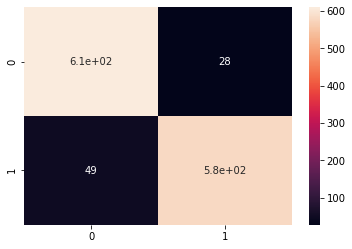

In [148]:
sns.heatmap(con_ma,annot=True)

####  <font color='blue'>Classification Report</font>

In [149]:
target_names = ['class 0', 'class 1']
cm_report=classification_report(y_te, y_predicted,target_names=target_names)
print(cm_report)

              precision    recall  f1-score   support

     class 0       0.93      0.96      0.94       637
     class 1       0.95      0.92      0.94       630

    accuracy                           0.94      1267
   macro avg       0.94      0.94      0.94      1267
weighted avg       0.94      0.94      0.94      1267



####  <font color='blue'>Testing our Model</font>

In [153]:
news = [
    'Hey mohan, can we get together to watch footbal game tomorrow?',
    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'
]
test=tfidf_vectorizer.transform(news)
model.predict(test)

array(['FAKE', 'FAKE'], dtype=object)

In [154]:
news = [
    "President Joe Biden received his Covid-19 vaccine booster shot on Monday afternoon at the White House just days after booster doses were approved by federal health officials.We know that to beat this pandemic and to save lives ... we need to get folks vaccinated, Biden said during remarks ahead of his shot. So, please, please do the right thing. Please get these shots. It can save your life and it can save the lives of those around you."
 + "The President received his first two doses of the Covid-19 vaccine ahead of his inauguration in January. The 78-year-old President qualified for a booster dose since he received his second Pfizer/BioNTech Covid-19 vaccine more than six months ago and is in an eligible age group."
+"The President had said Monday afternoon that Jill Biden would also be getting a shot soon but that the first lady -- a professor at Northern Virginia Community College outside Washington -- was teaching. Her press secretary Michael LaRosa told CNN later Monday that she had received her booster at the White House."
+"Biden joked on Monday about how he is way over the age of 65, which is part of the reason he is eligible for the shot. He said he didnt have any side effects after getting his first or second Covid-19 vaccine shots."
+"Boosters are important, but the most important thing we need to do is get more people vaccinated, Biden said."
]
test=tfidf_vectorizer.transform(news)
model.predict(test)


array(['REAL'], dtype=object)